In [74]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, dct

In [75]:
def W(x, size):
    return np.sqrt(1/size) if x == 0 else np.sqrt(2/size)

# Implementazione della DCT-2 fatta in casa
def dct2_home_made(x):
    N = x.shape[0]
    X = np.zeros_like(x)
    Wsr = np.ones((N, N))
    for s in range(N):
        for r in range(N):
            coeff = 0
            for i in range(N):
                for j in range(N):
                    coeff += x[i, j] * np.cos((s * np.pi * (2 * i + 1)) / (2 * N)) * np.cos((r * np.pi * (2 * j + 1)) / (2 * N))
            X[s, r] = coeff * W(s, N) * W(r, N)
    return X

# Utilizzo della DCT-2 dalla libreria scipy
def dct2_scipy(x):
    return dct(dct(x.T, norm='ortho').T, norm='ortho')

def fft2_scipy(x):
    return fft2(x)

# Function to measure execution time
def measure_time(func, x):
    start_time = time.time()
    result = func(x)
    end_time = time.time() - start_time
    print(result)
    print("**********************")
    return end_time

256
[[ 3.28712268e+04  -0.j         -3.05236706e+01 +19.38982184j
   8.22402352e+01 +93.23973864j ... -2.32952575e+00 +67.63491681j
   8.22402352e+01 -93.23973864j -3.05236706e+01 -19.38982184j]
 [ 1.55762803e+01 -60.25333278j -5.24440195e+01 +82.92882487j
  -1.15724100e+00 -32.08712641j ... -4.34903938e+01 +61.15250451j
  -1.75649606e+01 +99.92021674j -1.30372026e+01 -70.15882628j]
 [ 2.08445459e+00 -65.02398204j  5.18219453e+01 +86.65722675j
  -1.78990368e+01+106.74867837j ... -7.33129528e-02  -7.40543434j
   2.33170472e+01 -18.28545031j  5.91698801e+00 -70.03450633j]
 ...
 [-9.92880458e+01-104.31458891j -3.33315482e+01  +1.7486034j
  -4.53861917e+01 +15.53523966j ... -4.17281086e+01 -31.53407497j
   8.78054513e+01 -11.14125601j -8.69783332e+00 +67.6946093j ]
 [ 2.08445459e+00 +65.02398204j  5.91698801e+00 +70.03450633j
   2.33170472e+01 +18.28545031j ...  1.39888571e+00 -13.92211911j
  -1.78990368e+01-106.74867837j  5.18219453e+01 -86.65722675j]
 [ 1.55762803e+01 +60.25333278j -1.30

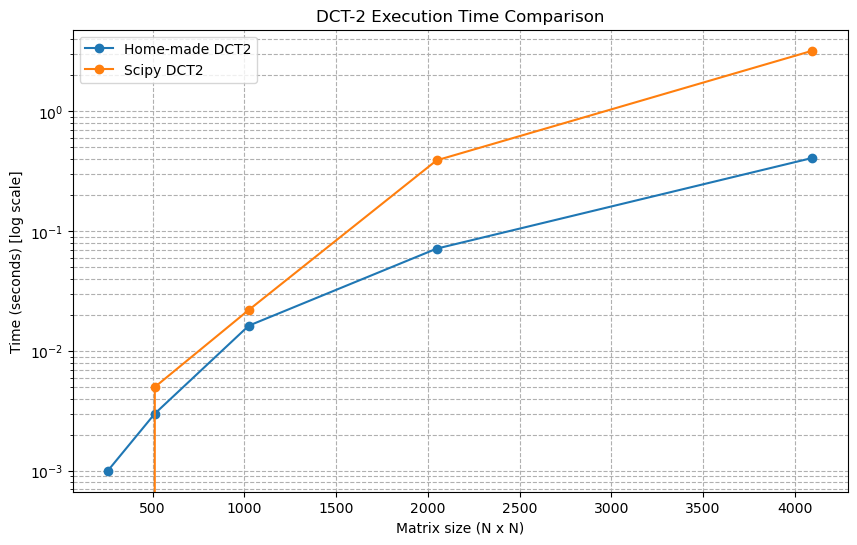

In [76]:
# Sizes of matrices
sizes = [256, 512, 1024, 2048, 4096]

# Lists to store execution times
times_home_made = []
times_scipy = []

for size in sizes:
    x = np.random.rand(size, size)
    print(size)
    # Measure time for home-made DCT2
    time_home_made = measure_time(fft2_scipy, x)
    times_home_made.append(time_home_made)
    
    # Measure time for scipy DCT2
    time_scipy = measure_time(dct2_scipy, x)
    times_scipy.append(time_scipy)

# Displaying the results
print("Sizes:", sizes)
print("Home-made DCT2 times:", times_home_made)
print("Scipy DCT2 times:", times_scipy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.semilogy(sizes, times_home_made, label='Home-made DCT2', marker='o')
plt.semilogy(sizes, times_scipy, label='Scipy DCT2', marker='o')
plt.xlabel('Matrix size (N x N)')
plt.ylabel('Time (seconds) [log scale]')
plt.title('DCT-2 Execution Time Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()